In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worldbank-indian-subcontinent-debt/e03e8683-2579-4616-8b2e-1043f73540c5_Data.csv


**This is a notebook in which I have tried using exploratory data analysis to find trends in the debt structure of 4 indian subcontinent countries which would be able to shed more light on the situations that Sri Lanka and Pakistan faced.**

The data has been obtained directly from the world bank debt database .

# Data Preprocessing

In [2]:
# Data Preprocessing Steps for imported data form worldbank database
data = pd.read_csv("/kaggle/input/worldbank-indian-subcontinent-debt/e03e8683-2579-4616-8b2e-1043f73540c5_Data.csv")
new_data = data.drop([16,17,18,19,20])
df1 = new_data
df1 = df1.drop(['Counterpart-Area Name', 'Counterpart-Area Code'], axis=1)
df1['Country'] = pd.concat([df1['Country Name'], df1['Country Code']], axis=1).astype(str).agg(' '.join, axis=1)
df1 = df1.drop(['Country Name', 'Country Code'], axis=1)
column_to_move = 'Country'

# Reorder the columns with the desired column at the beginning
df1 = df1[['Country'] + [col for col in df1.columns if col != 'Country']]



In [3]:
df1.head()

,Country,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,India IND,Short-term debt (% of total external debt),DT.DOD.DSTC.ZS,3.423200,2.755700,3.870700,5.321900,5.551400,7.274100,15.732200,...,21.698500,18.704400,17.033700,18.424800,19.079900,19.940200,19.033100,18.325100,18.732900,20.9394
1,India IND,Total reserves in months of imports,FI.RES.TOTL.MO,5.986632,7.323604,10.194786,12.108455,11.199488,8.407297,8.822493,...,5.989838,6.553492,7.963045,8.384340,8.106495,6.848289,8.215450,12.840685,9.769568,6.95282445382232
2,India IND,Total reserves (% of total external debt),FI.RES.TOTL.DT.ZS,39.705325,48.441713,66.555676,86.016782,105.464744,112.236898,110.392921,...,69.332051,70.563387,73.418610,78.967337,80.099927,76.004136,82.031177,103.728538,103.557890,91.2212754126058
3,India IND,Total external debt per capita (US$),DT.DOD.DECT.PC.CD,95.440050,92.217587,96.276378,106.392530,108.816633,104.963983,136.070527,...,330.907343,349.977916,361.964724,340.302951,377.770890,380.697171,405.619628,404.600780,434.784666,435.277062412753
4,Pakistan PAK,Short-term debt (% of total external debt),DT.DOD.DSTC.ZS,4.586900,4.058900,4.487000,3.361400,3.370800,3.557100,3.504400,...,7.715000,8.525400,9.416700,9.468600,9.349000,8.071800,8.400700,6.124200,6.933100,6.9073


In [4]:
df1.describe()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,63.751240,62.492303,70.195510,76.125793,79.719354,76.967114,82.648312,96.310835,103.386241,119.034158,...,171.790765,182.967108,195.369229,204.097045,213.460715,234.509419,241.318248,255.737828,264.303952,278.080128
std,128.932172,123.059310,135.757655,142.422319,151.504353,145.453357,151.580233,178.288110,204.093636,239.319353,...,421.120567,460.091139,491.843029,508.703827,537.649231,584.925865,606.459825,639.773823,645.876527,663.587940
min,1.608864,1.563841,2.188646,2.754750,2.794449,2.171111,2.613420,3.050101,1.819544,2.571900,...,3.131127,1.750075,3.065384,3.485311,2.802776,3.147338,1.884574,3.058996,3.304999,1.595438
25%,3.102625,3.384139,4.332925,4.863809,4.788230,3.966704,5.358920,6.079975,6.391755,7.018446,...,6.185511,7.283710,8.032423,9.053286,9.197535,9.038374,7.765922,8.354388,9.635294,6.771989
50%,6.805646,8.445778,10.257136,13.169542,13.772517,11.838399,17.481222,21.104823,17.218432,21.188952,...,20.727382,18.149764,19.063360,17.202800,18.635950,19.445408,15.632850,15.315250,15.198727,18.081571
75%,53.639006,59.385681,73.985852,91.110719,106.302716,106.782212,116.812323,137.987254,124.024060,123.616913,...,104.819973,104.674909,109.461951,116.371911,124.265033,138.984384,144.252732,155.877163,178.946598,186.364584
max,492.632377,473.149826,529.700028,555.659407,595.185452,574.372836,596.528840,705.292340,804.550385,952.238400,...,1700.321579,1860.451091,1989.823072,2058.678243,2177.847503,2360.440200,2442.071650,2573.859361,2594.755492,2650.862908


In [5]:
column_to_split = 'Series Name'

# Get unique values in the specified column
unique_values = df1[column_to_split].unique()

# Create a dictionary to store the separated DataFrames
separated_dfs = {}

# Iterate over unique values and store corresponding DataFrames in the dictionary
for value in unique_values:
    separated_dfs[value] = df1[df1[column_to_split] == value]

# Access individual DataFrames from the dictionary
short_term_debt_df = separated_dfs['Short-term debt (% of total external debt)']
reserves_in_months_df = separated_dfs['Total reserves in months of imports']
total_reserves_df = separated_dfs['Total reserves (% of total external debt)']
total_external_debt_df = separated_dfs['Total external debt per capita (US$)']


# 2 series were missing the data for 2022 for a country which was leading to an error and have thus been removed
reserves_in_months_df = reserves_in_months_df.drop(['2022 [YR2022]'], axis=1)
total_reserves_df= total_reserves_df.drop(['2022 [YR2022]'], axis=1)

A very interesting observation is that from 2005 India's and Sri Lanka's short term debt has shot up and remained at high levels as a percentage of total debt. While pakistan's continues to remain low.

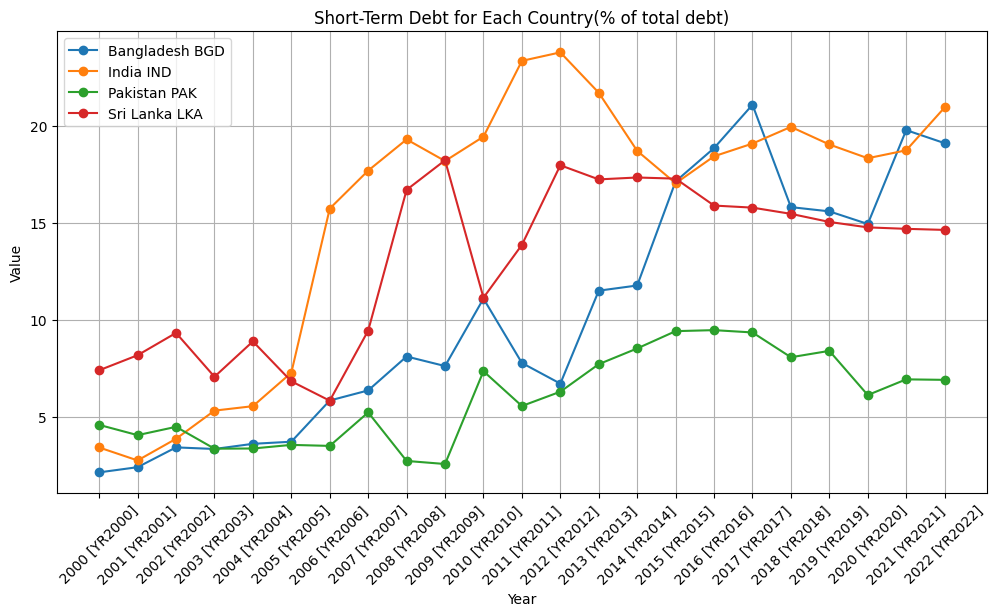

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming short_term_debt_df is your DataFrame

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the values for each year for each country
for country, country_df in short_term_debt_df.groupby('Country'):
    x_values = np.arange(len(country_df.columns[3:]))
    plt.plot(x_values, country_df.iloc[0, 3:], label=country, marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Short-Term Debt for Each Country(% of total debt)')
plt.legend()

# Set x-axis ticks and labels
plt.xticks(np.arange(len(country_df.columns[3:])), country_df.columns[3:], rotation=45)

# Show a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

Pakistan and Sri Lanka can clearly be seen struggling to maintain their reserves to a secure level , with bangladesh now also having a secure amount indicating the economic success of the country .

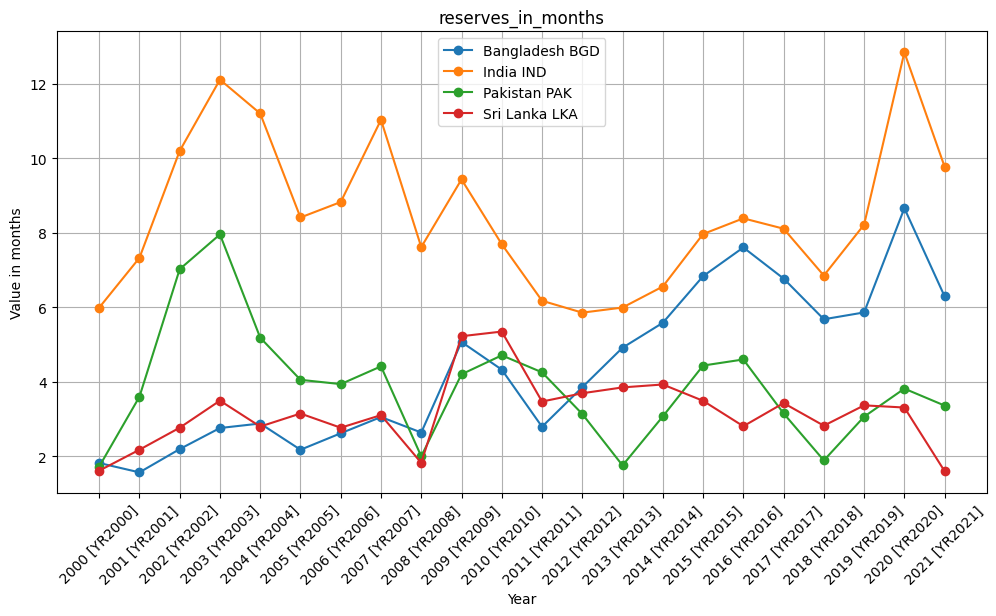

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming short_term_debt_df is your DataFrame

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the values for each year for each country
for country, country_df in reserves_in_months_df.groupby('Country'):
    x_values = np.arange(len(country_df.columns[3:]))
    plt.plot(x_values, country_df.iloc[0, 3:], label=country, marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value in months')
plt.title('reserves_in_months')
plt.legend()

# Set x-axis ticks and labels
plt.xticks(np.arange(len(country_df.columns[3:])), country_df.columns[3:], rotation=45)

# Show a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

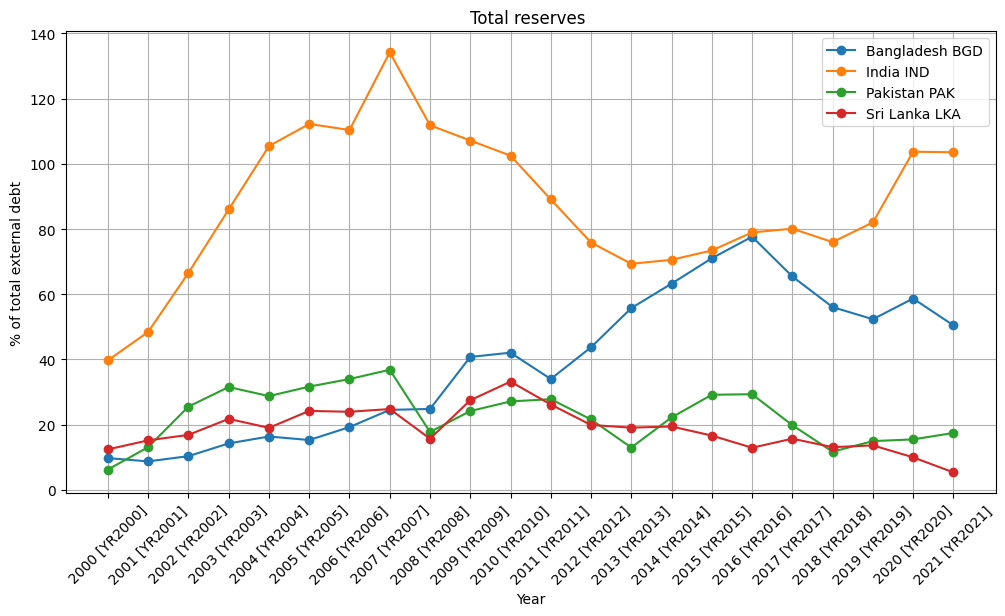

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming short_term_debt_df is your DataFrame

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the values for each year for each country
for country, country_df in total_reserves_df.groupby('Country'):
    x_values = np.arange(len(country_df.columns[3:]))
    plt.plot(x_values, country_df.iloc[0, 3:], label=country, marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('% of total external debt')
plt.title('Total reserves ')
plt.legend()

# Set x-axis ticks and labels
plt.xticks(np.arange(len(country_df.columns[3:])), country_df.columns[3:], rotation=45)

# Show a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

Sri Lanka has been accumulating debt since the financial crises of 2008, much higher than the other countries.

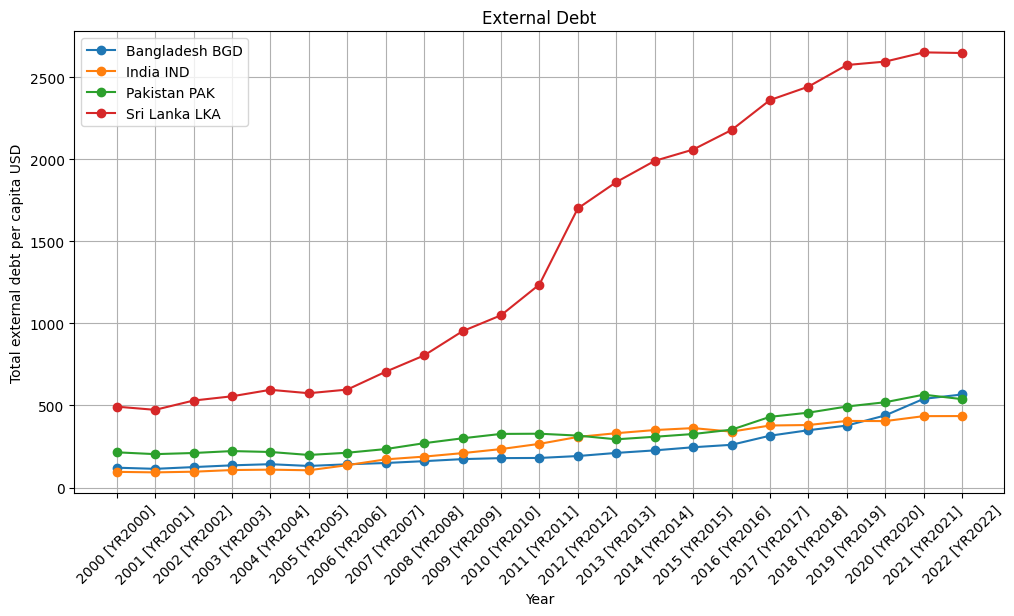

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming short_term_debt_df is your DataFrame

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the values for each year for each country
for country, country_df in total_external_debt_df.groupby('Country'):
    x_values = np.arange(len(country_df.columns[3:]))
    plt.plot(x_values, country_df.iloc[0, 3:], label=country, marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total external debt per capita USD')
plt.title('External Debt')
plt.legend()

# Set x-axis ticks and labels
plt.xticks(np.arange(len(country_df.columns[3:])), country_df.columns[3:], rotation=45)

# Show a grid for better readability
plt.grid(True)

# Show the plot
plt.show()